In [68]:
import numpy as np
from numpy.linalg import eigvals
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import LogNorm
from matplotlib.animation import FuncAnimation as FA

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

In [69]:
c1 = .2
c2 = .2
x = -.2

def f(x1, x2, a):
    mu1 = -4*x1*(x1**2 - c1**2) + (x+a)*x2
    mu2 = -4*x2*(x2**2 - c2**2) + (x-a)*x1
    return np.array([mu1, mu2])

D11 = lambda x1, x2, a: -4*(3*x1**2 - c1**2) + 0j
D22 = lambda x1, x2, a: -4*(3*x2**2 - c2**2) + 0j
D12 = lambda x1, x2, a: -(x + a) + 0j
D21 = lambda x1, x2, a: -(x - a) + 0j

l1 = lambda x1, x2, a: 1/2*( (D11(x1, x2, a) + D22(x1, x2, a)) + np.sqrt((D11(x1, x2, a) - D22(x1, x2, a))**2 + 4*D12(x1, x2, a)*D21(x1, x2, a)  ))
l2 = lambda x1, x2, a: 1/2*( (D11(x1, x2, a) + D22(x1, x2, a)) - np.sqrt((D11(x1, x2, a) - D22(x1, x2, a))**2 + 4*D12(x1, x2, a)*D21(x1, x2, a)  ))

def Cr (x1, x2, a): 
    C = np.logical_and(l1(x1, x2, a).real>0, l1(x1, x2, a).real>0)
    return np.ma.masked_where(C==0, C)

def Ci (x1, x2, a):
    C = l1(x1, x2, a).imag
    return np.ma.masked_where(C==0, C)

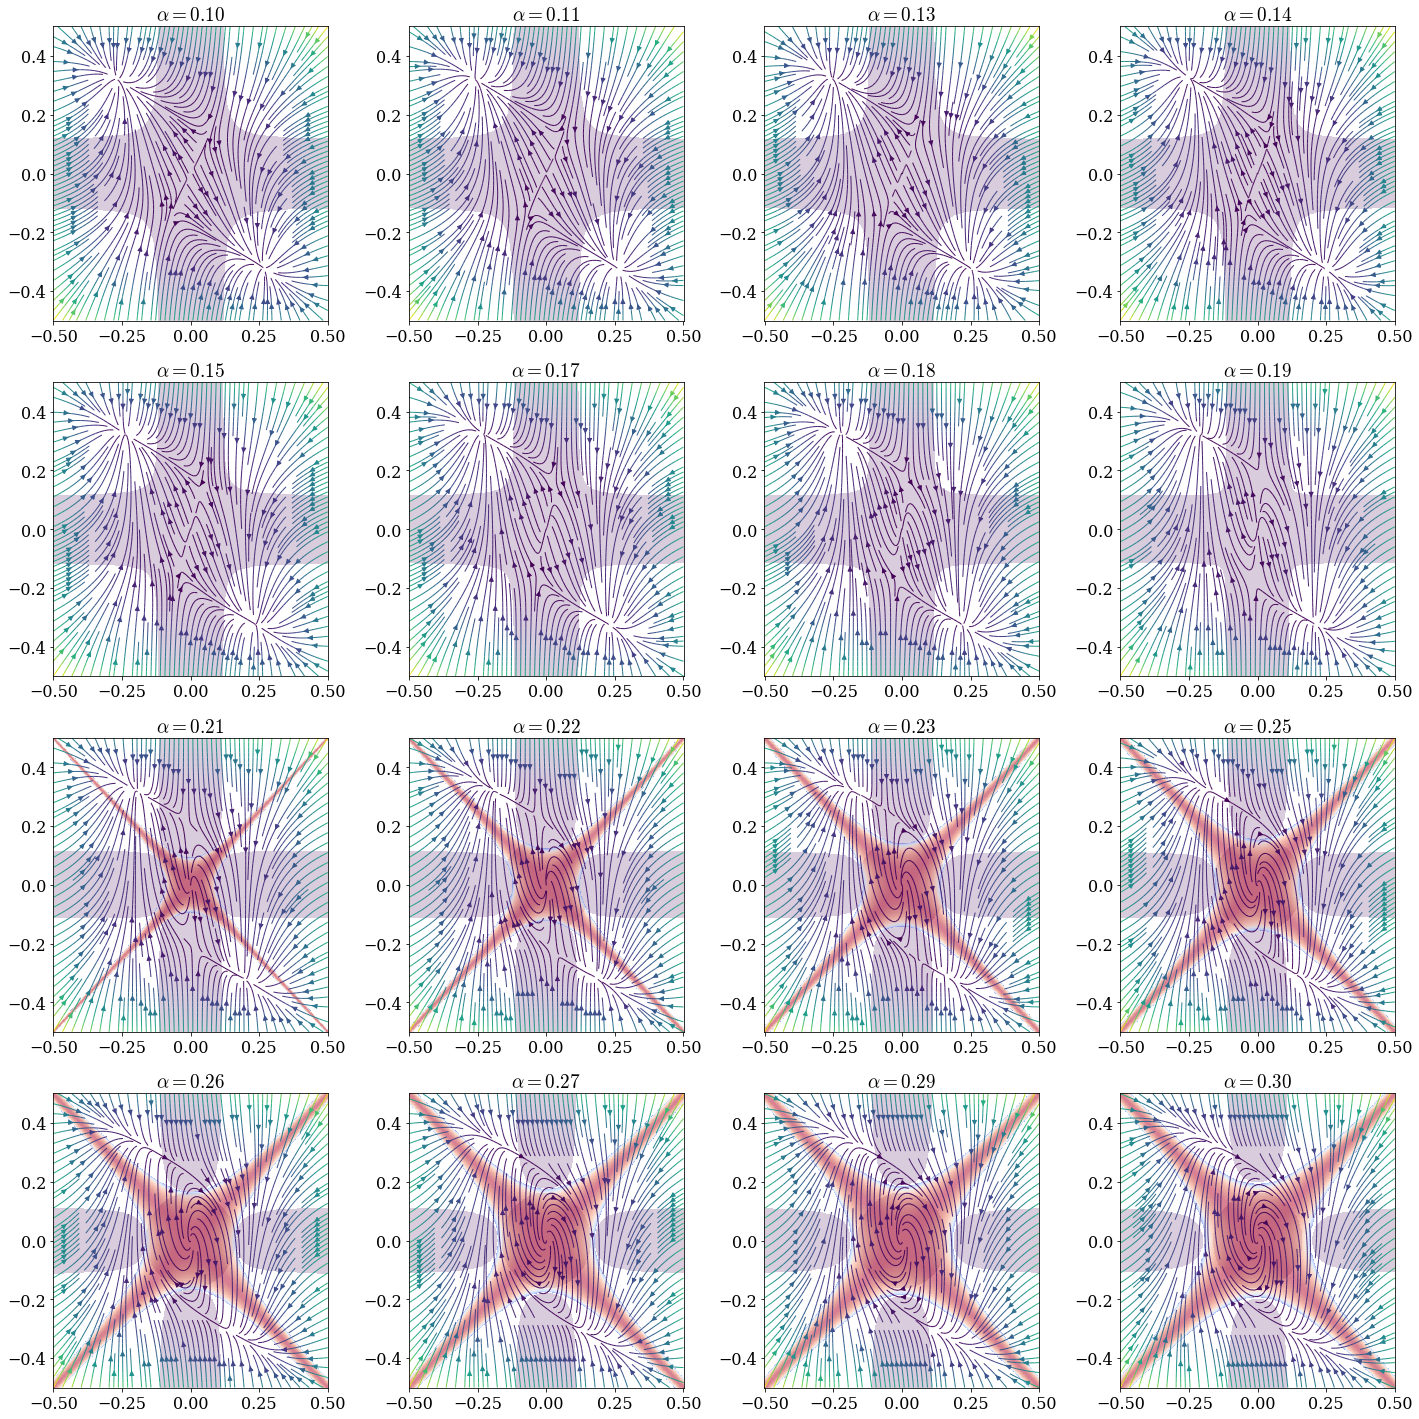

In [75]:
n = 500
a = .5
x1, x2 = np.linspace(-a, a, n), np.linspace(-a, a, n)
x1, x2 = np.meshgrid(x1, x2)

m = 4
aa = np.linspace(.1, .3, m**2)
fig, ax = plt.subplots(m, m, figsize=(20, 20))

for n, a in enumerate(aa):
    u, v = f(x1, x2, a )
    l = np.sqrt( u**2 + v**2)
    ax[n//m, n%m].pcolormesh(x1, x2, Cr(x1, x2, a), alpha=.2)
    ax[n//m, n%m].pcolormesh(x1, x2, Ci(x1, x2, a), alpha=.5, cmap='coolwarm')
    ax[n//m, n%m].streamplot(x1, x2, u, v, color=l, density=2., linewidth=1)
    ax[n//m, n%m].set_title("$\\alpha={:.2f}$".format(a))
plt.tight_layout()